# Fitting Code

Fit data from predator-prey spreadsheet, with error calculation for all predator species.


## Spreadsheet functions
Define functions for extracting information from spreadsheets.

In [4]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# These libraries allow us to read and write excel spreadsheets
import ipysheet as xl
import openpyxl
# 
def findCellString(sheet, target):
    '''
    Given the sheet name in an excel spreadsheet and a target string, return the indices of the cell containing the target.
    Only works for columns up to CZ!
    '''
    if not hasattr(findCellString, "alphabet"):
        findCellString.alphabet = ("A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M",
                                   "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z",
                                   "AA", "AB", "AC", "AD", "AE", "AF", "AG", "AH", "AI", "AJ", "AK", "AL", "AM",
                                   "AN", "AO", "AP", "AQ", "AR", "AS", "AT", "AU", "AV", "AW", "AX", "AY", "AZ",
                                   "BA", "BB", "BC", "BD", "BE", "BF", "BG", "BH", "BI", "BJ", "BK", "BL", "BM",
                                   "BN", "BO", "BP", "BQ", "BR", "BS", "BT", "BU", "BV", "BW", "BX", "BY", "BZ",
                                   "CA", "CB", "CC", "CD", "CE", "CF", "CG", "CH", "CI", "CJ", "CK", "CL", "CM",
                                   "CN", "CO", "CP", "CQ", "CR", "CS", "CT", "CU", "CV", "CW", "CX", "CY", "CZ")
    #
    targetCell = []
    for row in range(sheet.min_row, sheet.max_row):
        for col in findCellString.alphabet: 
            cell = "{}{}".format(col, row)
            if sheet[cell].value == target:
                targetCell.append(cell)
    return targetCell
# 
def findCellValue(sheet, target):
    '''
    Given the sheet name in an excel spreadsheet and a target value, return the indices of the cell containing the target.
    Only works for columns up to CZ!
    '''
    if not hasattr(findCellValue, "alphabet"):
        findCellValue.alphabet = ("A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M",
                                  "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z",
                                  "AA", "AB", "AC", "AD", "AE", "AF", "AG", "AH", "AI", "AJ", "AK", "AL", "AM",
                                  "AN", "AO", "AP", "AQ", "AR", "AS", "AT", "AU", "AV", "AW", "AX", "AY", "AZ",
                                  "BA", "BB", "BC", "BD", "BE", "BF", "BG", "BH", "BI", "BJ", "BK", "BL", "BM",
                                  "BN", "BO", "BP", "BQ", "BR", "BS", "BT", "BU", "BV", "BW", "BX", "BY", "BZ",
                                  "CA", "CB", "CC", "CD", "CE", "CF", "CG", "CH", "CI", "CJ", "CK", "CL", "CM",
                                  "CN", "CO", "CP", "CQ", "CR", "CS", "CT", "CU", "CV", "CW", "CX", "CY", "CZ")
        findCellValue.tol = 1E-12
    #
    targetCell = []
    for row in range(sheet.min_row, sheet.max_row):
        for col in findCellValue.alphabet: 
            cell = "{}{}".format(col, row)
            try:
                val = float(sheet[cell].value)
                if np.abs(float(sheet[cell].value) - target) < findCellValue.tol:
                    targetCell.append(cell)
            except:
                continue
    return targetCell
#
def cellInds(cell):
    '''
    Given the row and column of a cell in an excel spreadsheet, return its indices.
    Only works for columns up to BZ!
    '''
    if not hasattr(cellInds, "alphabet"):
        cellInds.alphabet = ("A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M",
                             "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z",
                             "AA", "AB", "AC", "AD", "AE", "AF", "AG", "AH", "AI", "AJ", "AK", "AL", "AM",
                             "AN", "AO", "AP", "AQ", "AR", "AS", "AT", "AU", "AV", "AW", "AX", "AY", "AZ",
                             "BA", "BB", "BC", "BD", "BE", "BF", "BG", "BH", "BI", "BJ", "BK", "BL", "BM",
                             "BN", "BO", "BP", "BQ", "BR", "BS", "BT", "BU", "BV", "BW", "BX", "BY", "BZ",
                             "CA", "CB", "CC", "CD", "CE", "CF", "CG", "CH", "CI", "CJ", "CK", "CL", "CM",
                             "CN", "CO", "CP", "CQ", "CR", "CS", "CT", "CU", "CV", "CW", "CX", "CY", "CZ")
    #
    number = ''
    for s in cell:
        if s.isdigit():
            number += s
    letters = ''
    for s in cell:
        if s.isalpha():
            letters += s
#
    try:
        col = cellInds.alphabet.index(letters) + 1
        row = int(number)
    except:
        col = -1
        row = -1
    return row, col
# 
# Create list of column values
def colList(sheet, col, minRow, maxRow):
    '''
    Given the sheet name in an excel spreadsheet, the required column, return a list  of all the values
    in the column between the minimum and maximum row numbers.
    '''
    colVals = []
    for row in range(minRow, maxRow):
        colVals.append(sheet.cell(row, col).value) 
    #
    return colVals
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2020-04-28 15:47:25.208354
 
Date and time 2020-04-28 15:47:26.253860
Time since last check is 0:00:01.045506


## Load spread sheet

Load spread sheet and test spreadsheet functions.

In [5]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
import os
import pandas as pd
import numpy as np
#
# Open Predator-Prey (PP) spreadsheet (data_only = True means values in cells read, not formulae)
PPbook = openpyxl.load_workbook('Predator-Prey-DB.xlsx', data_only = True)
PPnames = PPbook.sheetnames
print("Predator-Prey sheet names are:\n",PPnames)
PPsheet = PPbook['Land']
print("Active is",PPsheet)
#
print(" ")
print("Test findCellString")
findString = 'African Predators vs Prey (>5kg) Biomass'
print("findCellString(PPsheet, '" + findString +"') =", findCellString(PPsheet, findString))
print(" ")
print("Test findCellValue")
findValue = 10.69
print("findCellValue(PPsheet, " + str(findValue) +") =", findCellValue(PPsheet, findValue))
print(" ")
print("Test cellInds")
findCell = 'AA137'
print("cellInds(",findCell,") =", cellInds(findCell))
findCell = 'AA7'
print("cellInds(",findCell,") =", cellInds(findCell))
row, col = cellInds(findCell)
print("PPsheet(",row,",",col,").value =",PPsheet.cell(row, col).value)
print(" ")
print("Test colList")
column = 30 # column AD
rowTop = 74
rowBot = 119 + 1
print("colList(PPsheet,",column,",",rowTop,",",rowBot,")\n", colList(PPsheet, column, rowTop, rowBot))
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))

Date and time  2020-04-28 15:47:26.277617
Predator-Prey sheet names are:
 ['Refs', 'eco', 'ind', 'Land', 'Averages Data', 'Aqua']
Active is <Worksheet "Land">
 
Test findCellString
findCellString(PPsheet, 'African Predators vs Prey (>5kg) Biomass') = ['A4', 'A260', 'A281']
 
Test findCellValue
findCellValue(PPsheet, 10.69) = ['D290']
 
Test cellInds
cellInds( AA137 ) = (137, 27)
cellInds( AA7 ) = (7, 27)
PPsheet( 7 , 27 ).value = White Rhino
 
Test colList
colList(PPsheet, 30 , 74 , 120 )
 [42.9, 550, 70, 267, 4540, 2194.02986333333, 3000, 2780, None, 5605.49, 98, 3500, 3750, 2797, 627, 3000, 35, 95, 499.333333333333, 1993.2, None, None, 154, 127, 28, None, 56, 185.125, 105.7, 105.7, 32, 0.1, 398, 1450, 6.2, 30, 45, 5027, 15000, 34200, 13420, 5872, 3737, 400, 100, 185]
 
Date and time 2020-04-28 15:47:41.445614


## Analysis without error treatment

In [6]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# Get information from Predator-Prey workbook
# Look at predators vs prey, SE Africa
# Set cell where prey biomass data starts
preyBioMassBeg = 'F179'
#
# Find beginning row and column indices
preyRowBeg, preyCol = cellInds(preyBioMassBeg)
# Set cell where predator biomass data starts
predBioMassCell = 'G179'
#
# Find beginning row and column indices
predRowBeg, predCol = cellInds(predBioMassCell)
#
# Set row at which data for both prey and predators ends
endRow = 224
print(" ")
print("Prey: column",preyCol,"rows",preyRowBeg,"to",endRow,)
print("Predators: column",predCol,"rows",predRowBeg,"to",endRow,)
#
# Copy all prey and predator values into lists
preyRowEnd = endRow + 1
preyList = colList(PPsheet, preyCol, preyRowBeg, preyRowEnd)
print(" ")
print("List of prey data \n",preyList)
predRowEnd = endRow + 1
predList = colList(PPsheet, predCol, predRowBeg, predRowEnd)
print(" ")
print("List of predator data \n",predList)
#
# Turn the lists into numpy arraysto make them easier to manipulate 
preyTemp = np.array(preyList).astype(float)
predTemp = np.array(predList).astype(float)
print(" ")
print("Length of temporary predator array",len(predTemp))
print("Length of temporary prey array",len(preyTemp))
#
# Identify array elements which contain the value None
boolKeepPred = np.logical_not(np.isnan(predTemp))
boolKeepPrey = np.logical_not(np.isnan(preyTemp))
boolKeep = np.logical_and(boolKeepPred, boolKeepPrey)
nPoints = np.sum(boolKeep)
print(" ")
print("Number of valid entries in predator array",np.sum(boolKeepPred))
print("Number of valid entries in prey array",np.sum(boolKeepPrey))
print("Number of valid entries in final arrays",nPoints)
#
predArray = predTemp[boolKeep]
preyArray = preyTemp[boolKeep]
#
np.set_printoptions(precision = 1)
print(" ")
print("predArray\n",predArray)
print(" ")
print("preyArray\n",preyArray)
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2020-04-28 15:47:41.473706
 
Prey: column 6 rows 179 to 224
Predators: column 7 rows 179 to 224
 
List of prey data 
 [7114.621794871795, 158.44197972972972, 239.09699017199017, 480.3407480704532, 3506.1135416666666, 5295.540787732638, 608.3364924346631, 416.38174868609667, 257.8855578477581, 2795.730478640125, 1425.324549237171, 1197.6209911001106, 1428.9949444415188, 1618.7637579651373, 1205.7004054979195, 1356.1628837748171, 10170.583333333332, 5983.363636363637, 4862.996407185628, 3928.642186666667, 265.4391371340524, 306.99537750385207, 3271.1180327868856, 3658.1638888888933, 2677.4358974358975, 12945.824999999999, 15247.003717948692, 13038.428846153849, 12307.810576923077, 13225.00625, 3509.8888888888887, 1677.9535584800003, 2336.2640000000006, 2755.782608695652, 6930.835294117646, 3552.233333333333, 5155.523333333333, 2079.2824920918715, 2020.1233820960001, 2885.1519865920004, 2200.2753579840005, 2000.4964680159997, 1684.6179120379998, 1116.5656565656564, 174.2721

## Plot data

Date and time  2020-04-28 15:47:41.516383


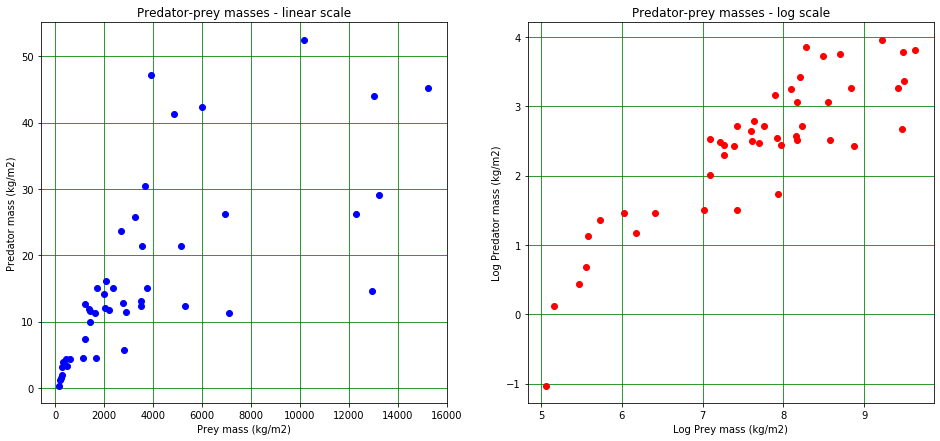

 
Date and time 2020-04-28 15:47:42.028329
Time since last check is 0:00:00.511946


In [7]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
plt.figure(figsize = (16, 7))
plt.subplot(1, 2, 1)
plt.title("Predator-prey masses - linear scale")
plt.plot(preyArray, predArray, linestyle = '', marker = 'o', color = 'b',)
plt.xlabel("Prey mass (kg/m2)")
plt.ylabel("Predator mass (kg/m2)")
plt.grid(color = 'g')
#
plt.subplot(1, 2, 2)
plt.title("Predator-prey masses - log scale")
plt.xlabel("Log Prey mass (kg/m2)")
plt.ylabel("Log Predator mass (kg/m2)")
plt.plot(np.log(preyArray), np.log(predArray), linestyle = '', marker = 'o', color = 'r',)
plt.grid(color = 'g')
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## Fit data without error treatment

Date and time  2020-04-28 15:47:42.094792
 
Number of points 46
 
xData			 yData
 8.87 +-  0.10		  2.43 +-  0.10
 5.07 +-  0.10		 -1.03 +-  0.10
 5.48 +-  0.10		  0.44 +-  0.10
 6.17 +-  0.10		  1.18 +-  0.10
 8.16 +-  0.10		  2.57 +-  0.10
 8.57 +-  0.10		  2.51 +-  0.10
 6.41 +-  0.10		  1.47 +-  0.10
 6.03 +-  0.10		  1.46 +-  0.10
 5.55 +-  0.10		  0.68 +-  0.10
 7.94 +-  0.10		  1.73 +-  0.10
 7.26 +-  0.10		  2.45 +-  0.10
 7.09 +-  0.10		  2.01 +-  0.10
 7.26 +-  0.10		  2.30 +-  0.10
 7.39 +-  0.10		  2.42 +-  0.10
 7.09 +-  0.10		  2.53 +-  0.10
 7.21 +-  0.10		  2.48 +-  0.10
 9.23 +-  0.10		  3.96 +-  0.10
 8.70 +-  0.10		  3.75 +-  0.10
 8.49 +-  0.10		  3.72 +-  0.10
 8.28 +-  0.10		  3.85 +-  0.10
 5.58 +-  0.10		  1.13 +-  0.10
 5.73 +-  0.10		  1.36 +-  0.10
 8.09 +-  0.10		  3.25 +-  0.10
 8.20 +-  0.10		  3.42 +-  0.10
 7.89 +-  0.10		  3.17 +-  0.10
 9.47 +-  0.10		  2.68 +-  0.10
 9.63 +-  0.10		  3.81 +-  0.10
 9.48 +-  0.10		  3.78 +-  0.10
 9.42 +-  0.10		  3.26 

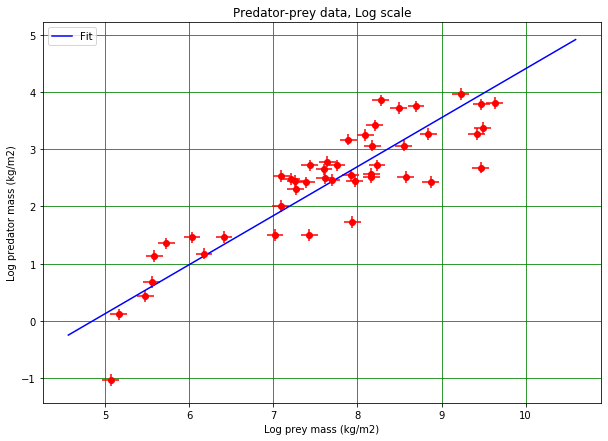

 
Date and time 2020-04-28 15:47:42.366423
Time since last check is 0:00:00.271631


In [8]:
import datetime
import math
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# least_squares is a fitting routine
from scipy.optimize import least_squares
#
# This "line magic" ensures plots are displayed in the Notebook
%matplotlib inline
#
# Straight line, derivative and error calculation
def fitLine(p, x):
    '''
    Straight line
    '''
    f = p[0] + p[1]*x
    return f
#
def fitLineDiff(p, x):
    '''
    Differential of straight line
    '''
    df = p[1]
    return df
#
def fitLineError(p, x, y, xerr, yerr):
    '''
    Error (chi) function for straight line fit
    '''
    e = (y - fitLine(p, x))/(np.sqrt(yerr**2 + fitLineDiff(p, x)**2*xerr**2))
    return e
#
# Define NumPy arrays, initially filled with zeros, to store the x and y data values for the fit
nPoints = len(predArray)
print(" ")
print("Number of points",nPoints)
xData = np.zeros(nPoints)
yData = np.zeros(nPoints)
#
# Define arrays to store the errors in x and y
xError = np.zeros(nPoints)
yError = np.zeros(nPoints)
#
# Transfer predator and prey data to fit arrays
xData = np.log(preyArray)
yData = np.log(predArray)
#
# Add error guesses for predator and prey masses
errPredArray = 0.1*np.ones(nPoints)
errPreyArray = 0.1*np.ones(nPoints)
errLogPredArray = 0.1*np.ones(nPoints)
errLogPreyArray = 0.1*np.ones(nPoints)
#
xError = errLogPreyArray
yError = errLogPredArray
print(" ")
print("xData\t\t\t yData")
for n in range(0, nPoints):
    print(f"{xData[n]:5.2f} +- {xError[n]:5.2f}\t\t {yData[n]:5.2f} +- {yError[n]:5.2f}")
#
# Set initial values of fit parameters, run fit
pInit = [-1.0, 0.6]
out = least_squares(fitLineError, pInit, args=(xData, yData, xError, yError))
#
fitOK = out.success
#
# Test if fit failed
if not fitOK:
    print(" ")
    print("Fit failed")
else:
    #
    # get output
    pFinal = out.x
    cVal = pFinal[0]
    mVal = pFinal[1]
    #
    #   Calculate chis**2 per point, summed chi**2 and chi**2/NDF
    chiarr = fitLineError(pFinal, xData, yData, xError, yError)**2
    chisq = np.sum(chiarr)
    NDF = nPoints - 2
    redchisq = chisq/NDF
#
    np.set_printoptions(precision = 3)
    print(" ")
    print("Fit quality:")
    print("chisq per point = \n",chiarr)
    print("chisq = {:5.2f}, chisq/NDF = {:5.2f}.".format(chisq, redchisq))
    #
    # Compute covariance from the Jacobian matrix returned by least_squares
    jMat = out.jac
    jMat2 = np.dot(jMat.T, jMat)
    detJmat2 = np.linalg.det(jMat2)
    #
    if detJmat2 < 1E-32:
        print("Value of determinat detJmat2",detJmat2)
        print("Matrix singular, error calculation failed.")
        print(" ")
        print("Parameters returned by fit:")
        print("Intercept = {:5.3f}".format(cVal))
        print("Exp intercept = {:5.3f}".format(np.exp(cVal)))
        print("Gradient = {:5.3f}".format(mVal))
        print(" ")
        cErr = 0.0
        mErr = 0.0
    else:
        covar = np.linalg.inv(jMat2)
        cErr = np.sqrt(covar[0, 0])
        mErr = np.sqrt(covar[1, 1])
        #
        print(" ")
        print("Parameters returned by fit:")
        print("Intercept = {:5.3f} +- {:5.3f}".format(cVal, cErr))
        print("Exp intercept = {:5.3f} +- {:5.3f}".format(np.exp(cVal), np.abs(cVal*np.exp(cVal)*cErr)))
        print("Gradient = {:5.3f} +- {:5.3f}".format(mVal, mErr))
        print(" ")
    #
    # Calculate fitted function values
    xFit = np.linspace(0.9*np.amin(xData), 1.1*np.amax(xData), nPoints)
    fitData = fitLine(pFinal, xFit)
    #
    # Plot data
    fig = plt.figure(figsize = (10, 7))
    plt.title('Predator-prey data, Log scale')
    plt.xlabel("Log prey mass (kg/m2)")
    plt.ylabel("Log predator mass (kg/m2)")
    
    plt.errorbar(xData, yData, xerr = xError, yerr = yError, color = 'r', marker = 'o', linestyle = '')
    plt.plot(xFit, fitData, color = 'b', linestyle = '-', label = "Fit") 
    #plt.xlim(1.0, 7.0)
    #plt.ylim(0.0, 3.0)
    plt.grid(color = 'g')
    plt.legend()
    plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

# FITTING LINEAR DATA

Date and time  2020-04-28 15:50:45.546580
 
Fit quality:
chisq per point = 
 [2.396e+04 1.108e+03 9.126e+02 1.110e+03 2.915e+03 1.130e+04 9.617e+02
 3.243e+02 7.738e+02 1.172e+04 2.807e-01 9.924e+02 2.720e+02 1.213e+02
 3.927e+02 4.269e+01 4.092e+04 3.206e+04 3.726e+04 7.591e+04 2.953e+02
 1.747e+02 6.326e+03 1.325e+04 5.772e+03 4.866e+04 2.819e+03 5.195e+03
 9.008e+03 6.288e+03 3.821e+03 6.605e+03 1.660e+00 1.295e+03 3.045e+00
 7.669e+02 1.507e+02 4.269e+02 3.244e+02 2.738e+03 7.625e+02 8.153e+00
 6.142e+02 3.261e+03 7.570e+02 1.681e+03]
chisq = 364058.19, chisq/NDF = 8274.05.
 
Parameters returned by fit:
Constant = 0.263 +- 0.002
Exponent = 0.521 +- 0.001
 


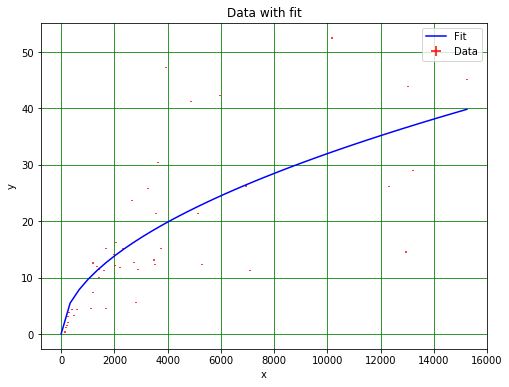

 
Date and time 2020-04-28 15:50:45.794675
Time since last check is 0:00:00.248095

7114.62 +-  0.10		 11.31 +-  0.10
158.44 +-  0.10		  0.36 +-  0.10
239.10 +-  0.10		  1.55 +-  0.10
480.34 +-  0.10		  3.24 +-  0.10
3506.11 +-  0.10		 13.12 +-  0.10
5295.54 +-  0.10		 12.34 +-  0.10
608.34 +-  0.10		  4.33 +-  0.10
416.38 +-  0.10		  4.30 +-  0.10
257.89 +-  0.10		  1.97 +-  0.10
2795.73 +-  0.10		  5.64 +-  0.10
1425.32 +-  0.10		 11.53 +-  0.10
1197.62 +-  0.10		  7.43 +-  0.10
1428.99 +-  0.10		  9.95 +-  0.10
1618.76 +-  0.10		 11.28 +-  0.10
1205.70 +-  0.10		 12.60 +-  0.10
1356.16 +-  0.10		 11.94 +-  0.10
10170.58 +-  0.10		 52.50 +-  0.10
5983.36 +-  0.10		 42.38 +-  0.10
4863.00 +-  0.10		 41.27 +-  0.10
3928.64 +-  0.10		 47.21 +-  0.10
265.44 +-  0.10		  3.11 +-  0.10
307.00 +-  0.10		  3.88 +-  0.10
3271.12 +-  0.10		 25.82 +-  0.10
3658.16 +-  0.10		 30.45 +-  0.10
2677.44 +-  0.10		 23.69 +-  0.10
12945.82 +-  0.10		 14.54 +-  0.10
15247.00 +-  0.10		 45.16 +-  0.10
130

In [13]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# least_squares is a fitting routine
from scipy.optimize import least_squares
#
# This "line magic" ensures plots are displayed in the Notebook
%matplotlib inline
#
# Scaling law, derivative and error calculation
def fitScale(p, x):
    '''
    Scaling law
    '''
    f = p[0]*x**p[1]
    return f
#
def fitScaleDiff(p, x):
    '''
    Differential of scaling law
    '''
    df = p[0]*p[1]*x**(p[1] - 1)
    return df
#
def fitScaleError(p, x, y, xerr, yerr):
    '''
    Error function for scaling fit
    '''
    e = (y - fitScale(p, x))/(np.sqrt(yerr**2 + fitScaleDiff(p, x)**2*xerr**2))
    return e
#
# Transfer predator and prey data to fit arrays
xData = preyArray
yData = predArray
#
# Add error guesses for predator and prey masses
xError = errPreyArray
yError = errPreyArray
#
# Set initial values of fit parameters, run fit
pInit = [0.01, -0.7]
out = least_squares(fitScaleError, pInit, args=(xData, yData, xError, yError))
#
fitOK = out.success
#
# Test if fit failed
if not fitOK:
    print(" ")
    print("Fit failed")
else:
    #
    # get output
    pFinal = out.x
    cVal = pFinal[0]
    mVal = pFinal[1]
    #
    #   Calculate chis**2 per point, summed chi**2 and chi**2/NDF
    chiarr = fitScaleError(pFinal, xData, yData, xError, yError)**2
    chisq = np.sum(chiarr)
    NDF = nPoints - 2
    redchisq = chisq/NDF
#
    np.set_printoptions(precision = 3)
    print(" ")
    print("Fit quality:")
    print("chisq per point = \n",chiarr)
    print("chisq = {:5.2f}, chisq/NDF = {:5.2f}.".format(chisq, redchisq))
    #
    # Compute covariance
    jMat = out.jac
    jMat2 = np.dot(jMat.T, jMat)
    detJmat2 = np.linalg.det(jMat2)
    #
    if detJmat2 < 1E-32:
        print("Value of determinat detJmat2",detJmat2)
        print("Matrix singular, error calculation failed.")
        print(" ")
        print("Parameters returned by fit:")
        print("Constant = {:5.3f}".format(cVal))
        print("Exponent = {:5.3f}".format(mVal))
        print(" ")
        cErr = 0.0
        mErr = 0.0
    else:
        covar = np.linalg.inv(jMat2)
        cErr = np.sqrt(covar[0, 0])
        mErr = np.sqrt(covar[1, 1])
        #
        print(" ")
        print("Parameters returned by fit:")
        print("Constant = {:5.3f} +- {:5.3f}".format(cVal, cErr))
        print("Exponent = {:5.3f} +- {:5.3f}".format(mVal, mErr))
        print(" ")
    #
    # Calculate fitted function values
    xFit = np.linspace(0.0, np.amax(xData), nPoints)
    fitData = fitScale(pFinal, xFit)
    #
    # Plot data
    fig = plt.figure(figsize = (8, 6))
    plt.title('Data with fit')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.errorbar(xData, yData, xerr = xError, yerr = yError, fmt='r', \
                 linestyle = '', label = "Data") 
    plt.plot(xFit, fitData, color = 'b', linestyle = '-', label = "Fit")
    #plt.xlim(1.0, 7.0)
    #plt.ylim(0.0, 3.0)
    plt.grid(color = 'g')
    plt.legend()
    plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))
print('')
for n in range(0, nPoints):
    print(f"{xData[n]:5.2f} +- {xError[n]:5.2f}\t\t {yData[n]:5.2f} +- {yError[n]:5.2f}")